=================================================

Graded Challenge 3

Nama  : Hafidz Abdillah Masruri
Batch : HCK-18

Program ini dibuat untuk melakukan web scraping serta melakukan analisa terhadap web tokopedia

=================================================

# A. Web Scraping

In [2]:
# import library yang akan dipakai
import pandas as pd
from bs4 import BeautifulSoup
from selenium import webdriver
import time


# setup seleinum webdriver
driver = webdriver.Chrome()

# membuat list baru
namaproduk = []
harga = []
penjual = []
kotatoko = []
banyakterjual = []
rating=[]

# cara agar page terbaca mulai dari 1 hingga yang diinginkan
page = range(1, 11)  # -> [1,2,3,4,5,6]
for x in page:

    # defined target website URL
    url=f"https://www.tokopedia.com/search?navsource=&page={x}&q=seblak&search_id=20240627170557EE46A882DC1D2B1F8Q2D&srp_component_id=02.01.00.00&srp_page_id=&srp_page_title=&st="

    # jika ingin membuat program berhenti selama 2 detik
    time.sleep(5)

    # redirect selenium to open the URL
    driver.get(url)

    # extract page content (HTML) from the website
    html = driver.page_source

    # convert/parse the HTML into BeautifulSoup object
    soup = BeautifulSoup(html, "html.parser")

    box = soup.find_all('div',{"class":"css-5wh65g"})

    for data in box:
        txtname = (data.find('span',{"class":"OWkG6oHwAppMn1hIBsC3pQ=="}))
        txtharga = (data.find('div',{"class":"_8cR53N0JqdRc+mQCckhS0g=="}))
        txtpenjual = (data.find('span',{"class":"X6c-fdwuofj6zGvLKVUaNQ== -9tiTbQgmU1vCjykywQqvA== flip"}))
        txtkotatoko = (data.find('span',{"class":"-9tiTbQgmU1vCjykywQqvA== flip"}))
        txtbanyakterjual = (data.find('span',{"class":"eLOomHl6J3IWAcdRU8M08A=="}))
        txtrating = (data.find('span',{"class":"nBBbPk9MrELbIUbobepKbQ=="}))

        if txtname:
            namaproduk.append(txtname.get_text().strip())
        else:
            namaproduk.append(None)

        if txtharga:
            harga.append(txtharga.get_text().strip())
        else:
            harga.append(None)

        if txtpenjual:
            penjual.append(txtpenjual.get_text().strip())
        else:
            penjual.append(None)

        if txtkotatoko:
            kotatoko.append(txtkotatoko.get_text().strip())
        else:
            kotatoko.append(None)

        if txtbanyakterjual:
            banyakterjual.append(txtbanyakterjual.get_text().strip())
        else:
            banyakterjual.append(None)

        if txtrating:
            rating.append(txtrating.get_text().strip())
        else:
            rating.append(None)


df = pd.DataFrame()

#membuat kolom2 baru
df['Produk'] = namaproduk
df['Harga'] = harga
df['Toko'] = penjual
df['Kota'] = kotatoko
df['Terjual'] =banyakterjual
df['Rating'] = rating

df

,Produk,Harga,Toko,Kota,Terjual,Rating
0,"Seblak Rafael, Seblak Coet Instan Halal",Rp25.000,Brother Meat Shop,Depok,500+ terjual,5.0
1,Seblak Rafael/Seblak Coet Instan Halal,Rp26.600,Foodstocks,Jakarta Selatan,250+ terjual,5.0
2,Seblak Instan,Rp8.000,ROEMAH MOSLEM,Kab. Boyolali,70+ terjual,5.0
3,Kerupuk Seblak Rafael Pedas / Seblak Mawar Ped...,Rp16.000,DUO BOCIL SNACK,Depok,250+ terjual,4.9
4,Seblak Sultan instant,Rp14.000,Sultan Meat Shop,Medan,250+ terjual,4.8
...,...,...,...,...,...,...
825,None,None,None,None,None,None
826,None,None,None,None,None,None
827,None,None,None,None,None,None
828,None,None,None,None,None,None


Hasil web scraping pada url tokopedia dengan pencarian seblak sebanyak 10 halaman dengan langkah langkah seperti import library serta setup penggunaan selenium, lalu selanjutnya diisi dengan pembuatan lis baru yang nantinya sebagai bentuk penyimpanan yang kita cari, penggunaan for x in page agar bisa membuat web melakukan perubahan pada url pencarian, time.sleep berfungsi sebagai membuat program berhenti sejenak selama yang ditentukan, data.find digunakan untuk pencarian dari apa yang akan kita cari yang nantinya disimpan dalam bentuk lis dan kita masukan semua agar menjadi dataframe

In [ ]:
df.to_csv("df.csv",index=False)

Melakukan penyimpanan pada hasil scraping menjadi csv

In [4]:
df=pd.read_csv('df.csv')

Melakukan pembacaan terhadap file csv

# B. Data Preparation

In [5]:
df_1=df.copy()
df_1

,Produk,Harga,Toko,Kota,Terjual,Rating
0,KerUpuk Seblak Kerupuk Beton Pedas Daun Jeruk ...,Rp15.000,Mega_Snack_095,Cimahi,6 terjual,5.0
1,"Seblak Rafael, Seblak Coet Instan Halal",Rp25.000,Brother Meat Shop,Depok,500+ terjual,5.0
2,Seblak Rafael/Seblak Coet Instan Halal,Rp26.600,Foodstocks,Jakarta Selatan,250+ terjual,5.0
3,seblak instan jeletot jajanan hits bandung 1 p...,Rp4.180,tokomakanankalimantan,Jakarta Barat,1rb+ terjual,4.8
4,KERUPUK SEBLAK MENTAH 1KG WARNA WARNI,Rp26.500,BociKakang,Jakarta Selatan,250+ terjual,5.0
...,...,...,...,...,...,...
823,NaN,NaN,NaN,NaN,NaN,NaN
824,NaN,NaN,NaN,NaN,NaN,NaN
825,NaN,NaN,NaN,NaN,NaN,NaN
826,NaN,NaN,NaN,NaN,NaN,NaN


Disini kita mendapatkan 6 kolom dimana berisi Produk, Harga, Toko, Kota, Terjual, Rating sebanyak 830 rows, tetapi isi tersebut masih terdapat banyak missing value, serta data belum dibersihkan, langkah yang akan kita lakukan adalah menghapus missing value, Rp pada harga, + terjual pada kolom terjual, serta mengganti type data agar sesuai dengan data

In [6]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 828 entries, 0 to 827
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Produk   203 non-null    object 
 1   Harga    203 non-null    object 
 2   Toko     203 non-null    object 
 3   Kota     203 non-null    object 
 4   Terjual  200 non-null    object 
 5   Rating   194 non-null    float64
dtypes: float64(1), object(5)
memory usage: 38.9+ KB


Pada df_1.info() disini bisa terlihat bahwasannya terdapat 830 rows tetapi jumlah tiap kolom berbeda yang artinya sangat banyak missing value, serta hanya ada 1 kolom yang memiliki typedata float yang lain object

In [7]:
df_2=df_1.dropna()
df_2=df_2.reset_index(drop=True)

Menghilangkan missing value serta reset index agar sesuai dengan urutan

In [8]:
df_2['Harga']=df_2['Harga'].str.replace('Rp','')
df_2['Harga']=df_2['Harga'].str.replace('.','')

Melakukan replace kepada Rp dan '.' dikarenakan nantinya akan merubah type data objek menjadi type data integer

In [9]:
def replace_terjual(dataframe):
    #Menghapus '+ terjual' yang berada pada isi table agar isi dapat dihitung
    for obj in dataframe.columns:
        if dataframe[obj].dtype == 'object':
            dataframe[obj] = dataframe[obj].str.replace("+ terjual", "")
replace_terjual(df_2)

def replace_terjual2(dataframe):
    #Menghapus ' terjual' yang berada pada isi table agar isi dapat dihitung
    for obj in dataframe.columns:
        if dataframe[obj].dtype == 'object':
            dataframe[obj] = dataframe[obj].str.replace(" terjual", "")
replace_terjual2(df_2)


df_2['Harga']=df_2['Harga'].str.replace('.','')
df_2['Terjual']=df_2['Terjual'].str.replace('rb','000')


Melakukan fungsi untuk menghapus huruf atau simbol yang tidak digunakan, serta mengganti beberapa kata seperti rb menjadi '000' agar nanti dapat dihitung

In [10]:
df_2

,Produk,Harga,Toko,Kota,Terjual,Rating
0,KerUpuk Seblak Kerupuk Beton Pedas Daun Jeruk ...,15000,Mega_Snack_095,Cimahi,6,5.0
1,"Seblak Rafael, Seblak Coet Instan Halal",25000,Brother Meat Shop,Depok,500,5.0
2,Seblak Rafael/Seblak Coet Instan Halal,26600,Foodstocks,Jakarta Selatan,250,5.0
3,seblak instan jeletot jajanan hits bandung 1 p...,4180,tokomakanankalimantan,Jakarta Barat,1000,4.8
4,KERUPUK SEBLAK MENTAH 1KG WARNA WARNI,26500,BociKakang,Jakarta Selatan,250,5.0
...,...,...,...,...,...,...
189,SEBLAK INSTANT PEDAS JERUK,10000,ICIP ICIP SNACK BANDUNG,Bandung,30,5.0
190,PILUS CIKUR 250 GRAM KHAS SUKABUMI BASO ACI/BO...,9999,ArfaOnlineShop,Tangerang,90,4.9
191,kerupuk mawar putih mentah 250 gram/kerupuk se...,5950,Aris lampu,Kab. Sidoarjo,2,5.0
192,cuanki lidah isi 25 topping baso aci dan seblak,6999,Culametan Food,Kab. Garut,6,4.5


Hasil dari pembersihan none serta perubahan pada simbol atau huruf yang tidak diperlukan

In [11]:
df_2['Harga'] = df_2['Harga'].astype(int)
df_2['Terjual'] = df_2['Terjual'].astype(float)

Merubah type data pada kolom 'Harga' dan 'Terjual' dari object menjadi integer dan float

In [12]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194 entries, 0 to 193
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Produk   194 non-null    object 
 1   Harga    194 non-null    int32  
 2   Toko     194 non-null    object 
 3   Kota     194 non-null    object 
 4   Terjual  194 non-null    float64
 5   Rating   194 non-null    float64
dtypes: float64(2), int32(1), object(3)
memory usage: 8.5+ KB


Hasil dari clean data yang sebelumnya memiki jumlah rows 830 menjadi 196 data siap pakai, dengan type data yang sudah dirubah

In [13]:
df_2.sample(10)

,Produk,Harga,Toko,Kota,Terjual,Rating
98,Somay mini Gurilem batagor mini toping seblak ...,13999,Distributor Cuanki dan Seblak,Kab. Bekasi,250.0,4.9
80,Kylafood Seblak Original Play,19125,kylafood,Bandung,1000.0,4.9
22,Pilus Cikur 1Kg Khas Garut Topping Baso Aci / ...,30000,Pedas Gilaa,Surabaya,500.0,4.9
82,Kylafood Seblak karuhun,12825,kylafood,Bandung,4000.0,4.8
51,SEBLAK INSTAN MOMMY,13900,Rav Jaya Display,Kab. Tangerang,1000.0,4.8
166,seblak ceker pedas kerupuk,10000,ken-olshop,Bekasi,250.0,5.0
3,seblak instan jeletot jajanan hits bandung 1 p...,4180,tokomakanankalimantan,Jakarta Barat,1000.0,4.8
138,KerUpuk Seblak Kerupuk Beton Pedas Daun Jeruk ...,15000,Mega_Snack_095,Cimahi,6.0,5.0
23,Seblak Instan Kenyang Murah Asli Bandung Resel...,7138,Berkah Food Bandung,Cimahi,7000.0,4.9
47,Gelifood Combo 3pcs Seblak Ceker Tanpa Tulang ...,65000,Lidigeli,Kab. Garut,50.0,4.7


Hasil akhir dari beberapa contoh tampilan data selesai clean

# C. Business Understanding/Problem Statement

#### Problem statment:
    Meningkatkan penjualan produk seblak sebanyak 20% melalui tokopedia dalam kurun waktu 3 bulan

#### SMART:
- Spesific (S):
    Meningkatkan penjualan produk seblak pada tokopedia
- Measurable (M):
    Peningkatan penjualan sebanyak 20% dari stock yang dijual
- Achievable (A):
    Implementasi pemasaran dan promosi untuk meningkatkan daya tarik penjualan
- Relevant (R):
    Meningkatkan varian topping, serta memberikan diskon agar penjualan dapat meningkat
- Time-bound (T):
    Dalam kurun waktu 3 bulan dapat meningkatkan penjualan sebesar 20%

# D. Analysis

In [14]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

Import beberapa library yang akan digunakan dalam penghitungan serta pembuatan grafik

## 1.

In [15]:
df_3=df_2.copy()
df_3.drop(['Produk'], axis=1, inplace=True)
df_3.drop(['Toko'], axis=1, inplace=True)
df_3.drop(['Kota'], axis=1, inplace=True)
df_3

,Harga,Terjual,Rating
0,15000,6.0,5.0
1,25000,500.0,5.0
2,26600,250.0,5.0
3,4180,1000.0,4.8
4,26500,250.0,5.0
...,...,...,...
189,10000,30.0,5.0
190,9999,90.0,4.9
191,5950,2.0,5.0
192,6999,6.0,4.5


Menghapus kolom yang tidak terpakai seperti 'Produk', 'Toko', 'Kota', karena yang dibutuhkan hanya kolom 'Harga', 'Terjual', 'Rating'

In [16]:
print("Rata-rata Harga:",df_3["Harga"].mean())
print("Median Harga:",df_3["Harga"].median())
print("Standar deviasi Harga:",df_3["Harga"].std())
print(f"Skewness Harga: {df_3['Harga'].skew()}")
print(f"Kurtosis Harga: {df_3['Harga'].kurtosis()}")


Rata-rata Harga: 22330.46907216495
Median Harga: 14437.5
Standar deviasi Harga: 23865.95759332085
Skewness Harga: 2.4920028082270633
Kurtosis Harga: 7.328461354536145


Pada cell diatas menjelaskan hasil dari rata-rata, median, standar deviasi, skewness, dan kurtosis dari kolom harga

In [17]:
print("Rata-rata barang terjual:",df_3["Terjual"].mean())
print("Median Barang Terjual:",df_3["Terjual"].median())
print("Standar deviasi Barang Terjual:",df_3["Terjual"].std())
print(f"Skewness Barang Terjual: {df_3['Terjual'].skew()}")
print(f"Kurtosis Barang Terjual: {df_3['Terjual'].kurtosis()}")

Rata-rata barang terjual: 702.6237113402062
Median Barang Terjual: 175.0
Standar deviasi Barang Terjual: 1586.233580423401
Skewness Barang Terjual: 4.290840294730278
Kurtosis Barang Terjual: 20.313693215226643


Pada cell diatas menjelaskan hasil dari rata-rata, median, standar deviasi, skewness, dan kurtosis dari kolom terjual

In [18]:
print("Rata-rata Rating:",df_3["Rating"].mean())
print("Median Rating:",df_3["Rating"].median())
print("Standar deviasi Rating:",df_3["Rating"].std())
print(f"Skewness Rating: {df_3['Rating'].skew()}")
print(f"Kurtosis Rating: {df_3['Rating'].kurtosis()}")

Rata-rata Rating: 4.885051546391752
Median Rating: 4.9
Standar deviasi Rating: 0.11073586845445847
Skewness Rating: -1.2731510799741355
Kurtosis Rating: 2.0277841947358026


Pada cell diatas menjelaskan hasil dari rata-rata, median, standar deviasi, skewness, dan kurtosis dari kolom rating

<Axes: >

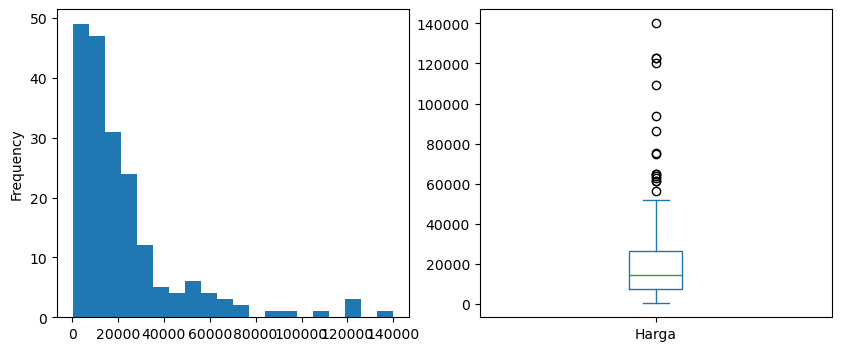

In [19]:
fig, ax = plt.subplots(ncols=2,figsize=(10,4))

df_3["Harga"].plot(kind='hist',bins=20,ax=ax[0])
df_3["Harga"].plot(kind='box',ax=ax[1])

Berikut adalah tampilan grafik dengan outlier pada data harga

<Axes: >

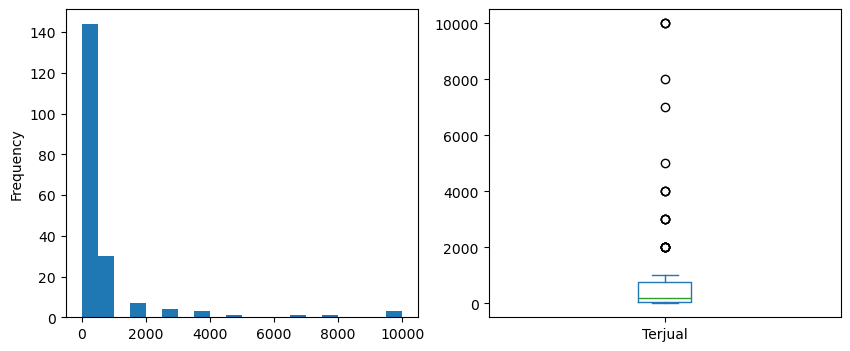

In [20]:
fig, ax = plt.subplots(ncols=2,figsize=(10,4))

df_3["Terjual"].plot(kind='hist',bins=20,ax=ax[0])
df_3["Terjual"].plot(kind='box',ax=ax[1])

Berikut adalah tampilan outlier pada data terjual

<Axes: >

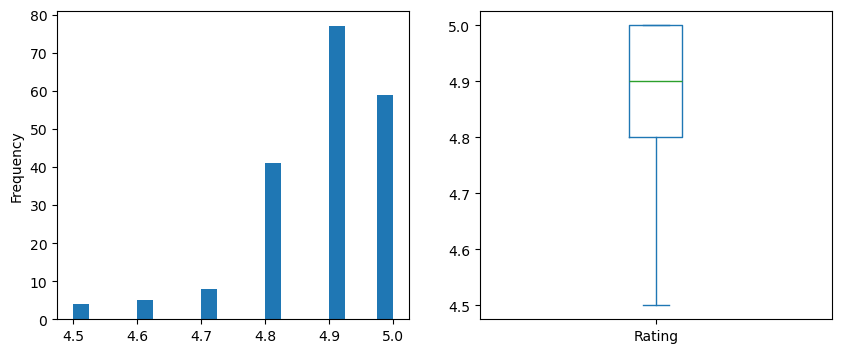

In [21]:
fig, ax = plt.subplots(ncols=2,figsize=(10,4))

df_3["Rating"].plot(kind='hist',bins=20,ax=ax[0])
df_3["Rating"].plot(kind='box',ax=ax[1])

Berikut adalah tampilan outlier pada data rating

## 2.

In [22]:
std = df_3["Harga"].std()
N = len(df_3["Harga"])
low, up = stats.norm.interval(0.95,loc=df_3["Harga"].mean(),scale=std/np.sqrt(N))
print('Lower Limit:',low)
print('Upper Limit:',up)

Lower Limit: 18972.118026186945
Upper Limit: 25688.820118142954


Pada cell diatas kita mendapatkan nilai lower limit serta upper limit pada kolom harga

In [23]:
pendapatan = pd.DataFrame()
pendapatan["Total Pendapatan"] = df_3["Harga"]*df_3["Terjual"]
pendapatan["Kota"] = df_2["Kota"]
pendapatan

,Total Pendapatan,Kota
0,90000.0,Cimahi
1,12500000.0,Depok
2,6650000.0,Jakarta Selatan
3,4180000.0,Jakarta Barat
4,6625000.0,Jakarta Selatan
...,...,...
189,300000.0,Bandung
190,899910.0,Tangerang
191,11900.0,Kab. Sidoarjo
192,41994.0,Kab. Garut


Untuk mencari total pendapatan diperukan harga dikali Barang Terjual

In [24]:
std = pendapatan["Total Pendapatan"].std()
N = len(pendapatan["Total Pendapatan"])
low, up = stats.norm.interval(0.95,loc=pendapatan["Total Pendapatan"].mean(),scale=std/np.sqrt(N))
print('Lower Limit:',low)
print('Upper Limit:',up)

Lower Limit: 6961467.821271107
Upper Limit: 14304864.869450543


Estimasi penjualan perbulan didapat lower sebesar 6,96 juta
serta didapat upper sebesar 14,3 juta

## 3.

In [25]:
jabodetabek = df_2[df_2['Kota'].str.contains('Depok|Jakarta Selatan|Jakarta Barat|Jakarta Timur|Jakarta Pusat|Jakarta Utara|Tangerang Selatan|Bekasi|Bogor|Tangerang')]
luar = df_2[df_2['Kota'].str.contains('Depok|Jakarta Selatan|Jakarta Barat|Jakarta Timur|Jakarta Pusat|Jakarta Utara|Tangerang Selatan|Bekasi|Bogor|Tangerang')==False]

Memfilter jabodetabek dan luar jabodetabek dimanaa jabodetabek disimpan pada "jabodetabek" dan diluar jabodetabek disimpan dengan "luar"

In [26]:
print("Rata-rata harga Jabodetabek: ",jabodetabek['Harga'].mean())

Rata-rata harga Jabodetabek:  23504.772727272728


Rata-rata harga seblak di jabodetabek sebesar 23.500

In [27]:
print("Rata-rata harga luar: ",luar['Harga'].mean())

Rata-rata harga luar:  21724.96875


Berikut adalah harga rata-rata seblak di luar jabodetabek sebesar 21.700

In [28]:
t_stat, p_val = stats.ttest_ind(jabodetabek['Harga'],luar['Harga'])
print('T-Statistic:',t_stat)
print('P-value:',p_val) #

T-Statistic: 0.4911498408391872
P-value: 0.6238814088466749


Berikut pengecekan normalisasi harga jabodetabek dan luar didapat T-Statistic: 0.491 dan P-value: 0.624

Uji Hipotesis menggunakan Two-Sample Independent Test:

H0 = Rata rata harga seblak di Jabodetabek sama dengan harga diluar Jabodetabek

H1 = Rata rata harga seblak di Jabodetabek tidak sama dengan harga diluar Jabodetabek

## 4.

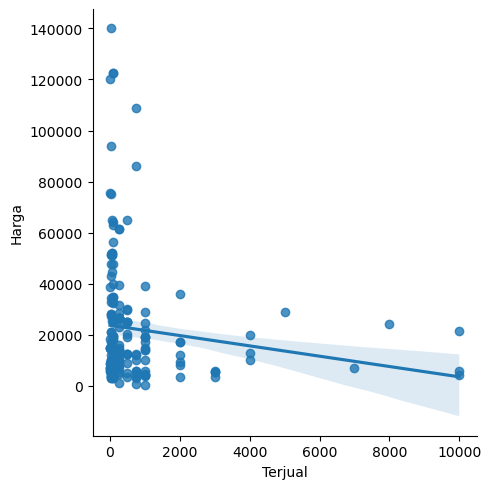

In [31]:
sns.lmplot(data=df_2,x='Terjual', y='Harga')

Berikut grafik korelasi dari harga seblak dan seblak terjual, kebanyakan masyarakat yang membeli seblak cenderung lebih memilih harga seblak yang terbilang murah

In [30]:
corr_r, pval_p = stats.pearsonr(df_2['Harga'],df_2['Terjual'])
corr_rho, pval_s = stats.spearmanr(df_2['Harga'],df_2['Terjual'])
corr_tau, pval_k = stats.kendalltau(df_2['Harga'],df_2['Terjual'])

print(f"(Pearson) correlation-r : {corr_r:.2f}, p-value: {pval_p}")
print(f"(Spearman) correlation-rho  : {corr_rho:.2f}, p-value: {pval_s}")
print(f"(Kendall) correlation-tau   : {corr_tau:.2f}, p-value: {pval_k}")

(Pearson) correlation-r : -0.13, p-value: 0.06197135405029176
(Spearman) correlation-rho  : -0.17, p-value: 0.017042691153481334
(Kendall) correlation-tau   : -0.12, p-value: 0.014074242052491154


Pearson  nilai -0.13 artinya hubungan negatif. P-value (0.06197) menunjukkan tingkat signifikansi dari korelasi tersebut. Dalam hal ini, p-value lebih besar dari 0.05, sehingga tidak cukup bukti untuk menolak hipotesis nol (tidak ada korelasi).

Spearman nilai -0.17 artinya hubungan negatif. p-value < 0.05 sehingga kita dapat menolak hipotesis nol dan menyimpulkan (adanya korelasi).

Kendall nilai -0.12 menunjukkan adanya hubungan negatif. P-value < 0.05 sehingga kita dapat menolak hipotesis nol dan menyimpulkan adanya korelasi.

# Kesimpulan
<div class="justify">Masyarakat jabodetabek maupun luar membeli seblak pada Tokopedia dengan rata2 Harga Rp22330 dan rata2 toko dapat menjual sebanyak 702pcs dengan rating yang bisa dibilang cukup tinggi sebesar 4,9/5. Harga rata-rata pendapatan toko seblak pada Tokopedia sebesar minimum pada angka 6.961.467 dan terbesar pada angka Rp.14.304.864, dimana rata2 Harga seblak pada lokasi jabodetabek sebesar Rp23500 dan luar jabodetabek Rp21700, uji hipotesis menggunakan two-sample independent test dengan h0 rata2 seblak jabodetabek sama dengan luar jabodetabek, dan rata2 seblak beda dengan luar jabodetabek, serta didapat korelasi bahwa pemebeli terbesar kebanyakan membeli seblak dengan Harga terendah baik diluar jabodetabek maupun didalam jabodetabek</div>